<a href="https://colab.research.google.com/github/IT21373770/24_25J_182-Adaptive-Pedestrian-Crossing-System/blob/main/Pedestrian_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install ultralytics opencv-python matplotlib numpy gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 10.4 MB/s eta 0:00:00


In [ ]:
# Import Libraries
from ultralytics import YOLO
import os
import cv2
import random
import matplotlib.pyplot as plt
import pandas as pd

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load YOLOv8 Model
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 72.4MB/s]


In [ ]:
import os

images_dir = '/content/drive/MyDrive/datasets/pedestrians/train/images'
labels_dir = '/content/drive/MyDrive/datasets/pedestrians/train/labels'

images = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
labels = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")


Number of images: 474
Number of labels: 474


In [ ]:
# Function to Load a Random Image with Annotations
def load_random_sample(folder_path):
    """
    Randomly selects an image and its corresponding label from the dataset folder,
    then visualizes the image with bounding boxes and class labels.
    """
    image_folder = os.path.join(folder_path, "images")
    label_folder = os.path.join(folder_path, "labels")

    # Randomly select an image file
    image_file = random.choice(os.listdir(image_folder))
    label_file = os.path.splitext(image_file)[0] + '.txt'

    # Load image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load label
    label_path = os.path.join(label_folder, label_file)
    h, w, _ = image.shape
    with open(label_path, 'r') as file:
        for line in file:
            # Parse YOLO annotation
            class_id, x_center, y_center, box_width, box_height = map(float, line.split())

            # Convert YOLO format to pixel coordinates
            x_min = int((x_center - box_width / 2) * w)
            y_min = int((y_center - box_height / 2) * h)
            x_max = int((x_center + box_width / 2) * w)
            y_max = int((y_center + box_height / 2) * h)

            # Draw bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(image, f"Class {int(class_id)}", (x_min, y_min - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


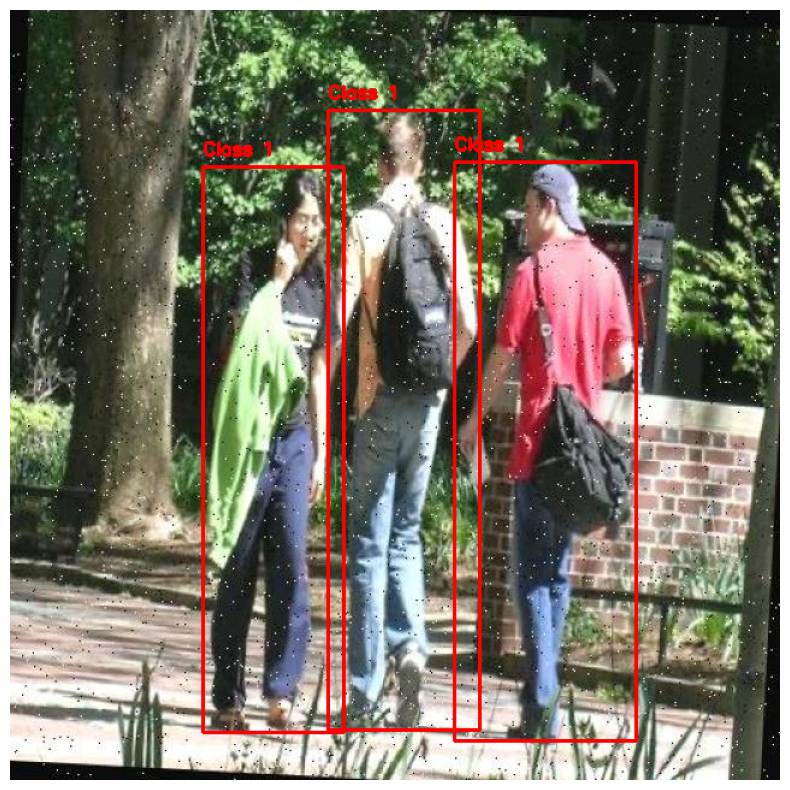

In [ ]:
import random

# Example Usage
load_random_sample('/content/drive/MyDrive/datasets/pedestrians/test')

In [ ]:
# Pedestrian Detection Function
def detect_pedestrians_with_yolov8(image_path, confidence=0.5):
    """
    Detect pedestrians in an image using YOLOv8 and visualize results.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Run YOLOv8 inference
    results = model.predict(image, conf=confidence, save=False)
    annotated_image = results[0].plot()  # Annotated image with bounding boxes

    # Display results
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [ ]:
!ls '/content/drive/MyDrive/datasets/pedestrians/test/images/test.jpg'

/content/drive/MyDrive/datasets/pedestrians/test/images/test.jpg



0: 384x640 6 persons, 5 cars, 433.2ms
Speed: 15.9ms preprocess, 433.2ms inference, 54.1ms postprocess per image at shape (1, 3, 384, 640)


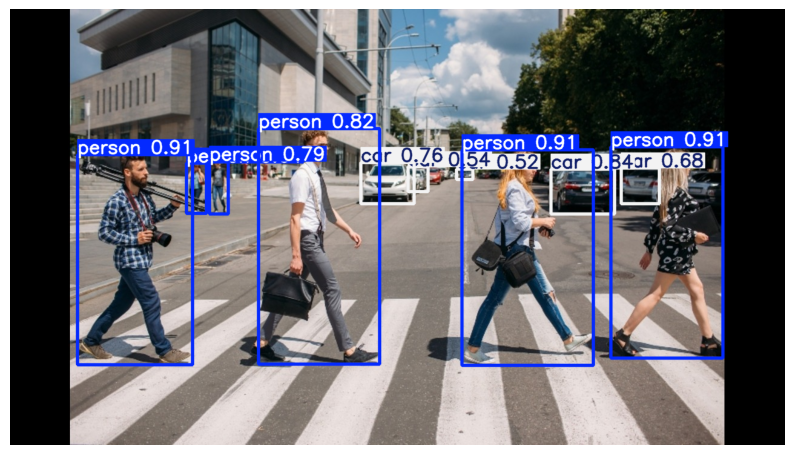

In [ ]:
# Example Usage of YOLOv8 Detection
test_image_path = '/content/drive/MyDrive/datasets/pedestrians/test/images/test.jpg'
detect_pedestrians_with_yolov8(test_image_path, confidence=0.5)

In [ ]:
# Train YOLOv8 Model
model.train(
    data='/content/drive/MyDrive/datasets/pedestrians/data.yaml',  # Path to YAML file
    epochs=25,  # Number of training epochs
    batch=8,   # Batch size
    imgsz=512,  # Image size
    optimizer='AdamW'  # Optimizer choice

)
print("Training Completed!")

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/datasets/pedestrians/data.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/datasets/pedestrians/train/labels... 474 images, 9 backgrounds, 0 corrupt: 100%|██████████| 474/474 [02:52<00:00,  2.75it/s]


train: New cache created: /content/drive/MyDrive/datasets/pedestrians/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/datasets/pedestrians/valid/labels... 145 images, 4 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:53<00:00,  2.73it/s]


val: New cache created: /content/drive/MyDrive/datasets/pedestrians/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.951      1.942      1.729          7        512: 100%|██████████| 60/60 [04:30<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.29s/it]

                   all        145        328      0.734      0.237      0.228        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G       1.65      1.602      1.507         11        512: 100%|██████████| 60/60 [04:28<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:33<00:00,  3.31s/it]

                   all        145        328      0.821      0.328       0.35      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.623      1.555      1.514          8        512: 100%|██████████| 60/60 [04:29<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.26s/it]

                   all        145        328      0.823      0.342      0.333       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.522      1.418      1.443         12        512: 100%|██████████| 60/60 [04:27<00:00,  4.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.17s/it]

                   all        145        328      0.832       0.37      0.438      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G       1.48      1.385      1.419          3        512: 100%|██████████| 60/60 [04:25<00:00,  4.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.27s/it]

                   all        145        328      0.896      0.374       0.49      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      1.432      1.324      1.389          3        512: 100%|██████████| 60/60 [04:27<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.16s/it]

                   all        145        328       0.86      0.375        0.5      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      1.411      1.311      1.382          7        512: 100%|██████████| 60/60 [04:27<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.13s/it]

                   all        145        328      0.865      0.417      0.509      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G      1.387      1.266      1.374         15        512: 100%|██████████| 60/60 [04:23<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.21s/it]

                   all        145        328      0.871      0.406      0.512      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.392      1.251      1.366         16        512: 100%|██████████| 60/60 [04:25<00:00,  4.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:33<00:00,  3.31s/it]

                   all        145        328      0.551      0.547      0.505        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      1.316      1.201      1.326          5        512: 100%|██████████| 60/60 [04:32<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.20s/it]

                   all        145        328      0.597      0.577      0.557      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.297      1.204      1.315          4        512: 100%|██████████| 60/60 [04:29<00:00,  4.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.14s/it]

                   all        145        328      0.665      0.568      0.593      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      1.282      1.192      1.294          8        512: 100%|██████████| 60/60 [04:25<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.20s/it]

                   all        145        328      0.647      0.608      0.594      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G      1.327      1.225       1.33          6        512: 100%|██████████| 60/60 [04:26<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.21s/it]

                   all        145        328      0.578       0.61      0.612      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      1.219      1.123      1.283         13        512: 100%|██████████| 60/60 [04:23<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:37<00:00,  3.75s/it]

                   all        145        328      0.803      0.604      0.654       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G      1.211      1.094      1.267          8        512: 100%|██████████| 60/60 [04:25<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.13s/it]

                   all        145        328      0.679      0.586      0.621        0.4


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G       1.04     0.9875      1.162          5        512: 100%|██████████| 60/60 [04:25<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:33<00:00,  3.31s/it]

                   all        145        328      0.716      0.624      0.653      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G     0.9973     0.8538      1.124          4        512: 100%|██████████| 60/60 [04:24<00:00,  4.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.16s/it]

                   all        145        328      0.742      0.631      0.664      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G     0.9406     0.8392      1.112          5        512: 100%|██████████| 60/60 [04:24<00:00,  4.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.16s/it]

                   all        145        328      0.792      0.607      0.666      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G     0.9381     0.8356      1.123          9        512: 100%|██████████| 60/60 [04:24<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.22s/it]

                   all        145        328      0.678      0.677      0.666      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G      0.901     0.7614      1.098          5        512: 100%|██████████| 60/60 [04:24<00:00,  4.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:36<00:00,  3.70s/it]

                   all        145        328      0.769      0.651      0.661      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G     0.8813     0.7629       1.07          5        512: 100%|██████████| 60/60 [04:25<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.11s/it]

                   all        145        328      0.763      0.649       0.69      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G     0.8236     0.7601      1.061          5        512: 100%|██████████| 60/60 [04:21<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.18s/it]

                   all        145        328      0.739      0.657      0.704      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G     0.8239     0.7384      1.048         13        512: 100%|██████████| 60/60 [04:24<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.30s/it]

                   all        145        328       0.78      0.658      0.688      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G      0.772     0.6707      1.024          4        512: 100%|██████████| 60/60 [04:24<00:00,  4.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.10s/it]


                   all        145        328       0.77       0.65      0.682      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G     0.7642     0.6579      1.013          7        512: 100%|██████████| 60/60 [04:21<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.11s/it]

                   all        145        328      0.793      0.658      0.701      0.508



25 epochs completed in 2.081 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.76s/it]


                   all        145        328      0.793      0.657      0.701      0.509
            pedestrian          5         52      0.726      0.408      0.473      0.258
                people        136        276      0.859      0.906      0.929      0.759
Speed: 2.0ms preprocess, 164.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train
Training Completed!


In [ ]:
# Detect Pedestrians in New Images
def detect_pedestrians(image_path, confidence=0.5):
    """
    Detect pedestrians in an image using the trained YOLOv8 model.
    """
    results = model.predict(image_path, conf=confidence, save=False)
    annotated_image = results[0].plot()  # Annotated image

    # Display results
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


image 1/1 /content/drive/MyDrive/datasets/pedestrians/test/images/sample.jpg: 352x512 5 persons, 8 cars, 127.0ms
Speed: 2.6ms preprocess, 127.0ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 512)


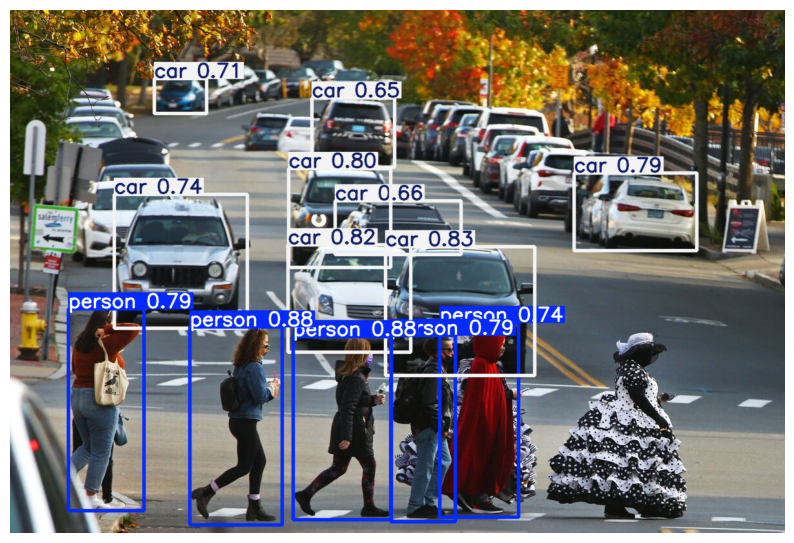

In [ ]:
# Test the Model on a Sample Image
test_image = '/content/drive/MyDrive/datasets/pedestrians/test/images/sample.jpg'
detect_pedestrians(test_image, confidence=0.5)


image 1/1 /content/drive/MyDrive/datasets/pedestrians/test/images/test.jpg: 288x512 6 persons, 4 cars, 136.8ms
Speed: 3.1ms preprocess, 136.8ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 512)
Number of pedestrians detected: 6
Suggested crossing time: 27 seconds


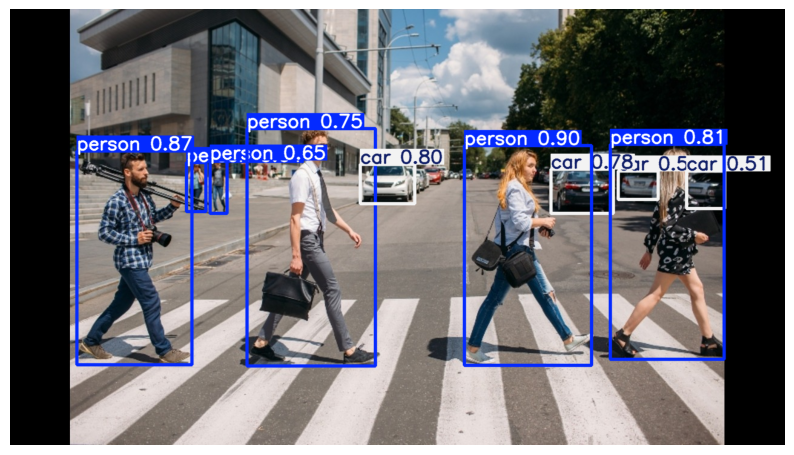

In [ ]:
# Perform inference with YOLOv8 on a sample image
sample_image = '/content/drive/MyDrive/datasets/pedestrians/test/images/test.jpg'
results = model.predict(sample_image, conf=0.5)

# Load class names (adjust this based on your dataset's YAML file)
class_names = ['pedestrian', 'car', 'bike', 'bus', 'truck']
pedestrian_class_id = class_names.index('pedestrian')

# Count pedestrians in the detections
pedestrian_count = 0
for result in results:
    for box in result.boxes:
        if int(box.cls) == pedestrian_class_id:
            pedestrian_count += 1

# Calculate crossing time based on pedestrian count
base_time = 15 # Base time in seconds for crossing
additional_time_per_pedestrian = 2  # Additional time per pedestrian in seconds
crossing_time = base_time + pedestrian_count * additional_time_per_pedestrian

# Display the pedestrian count and crossing time
print(f"Number of pedestrians detected: {pedestrian_count}")
print(f"Suggested crossing time: {crossing_time} seconds")

# Visualize detections
annotated_image = results[0].plot()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
# Perform validation on the test set
results = model.val(data='/content/drive/MyDrive/datasets/pedestrians/data.yaml',
                    split='test')

# Extract and convert metrics to percentages
precision = results.results_dict['metrics/precision(B)'] * 100
recall = results.results_dict['metrics/recall(B)'] * 100
map50 = results.results_dict['metrics/mAP50(B)'] * 100
map50_95 = results.results_dict['metrics/mAP50-95(B)'] * 100

# Print the metrics
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"mAP@50: {map50:.2f}%")
print(f"mAP@50-95: {map50_95:.2f}%")


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/datasets/pedestrians/test/labels.cache... 428 images, 9 backgrounds, 0 corrupt: 100%|██████████| 430/430 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [01:21<00:00,  1.50s/it]


                   all        430        968      0.693      0.649      0.667      0.493
            pedestrian         12         85      0.485      0.376      0.384      0.221
                people        409        883        0.9      0.922      0.949      0.766
Speed: 1.8ms preprocess, 160.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train3
Precision: 69.27%
Recall: 64.92%
mAP@50: 66.67%
mAP@50-95: 49.34%


In [ ]:
# Path to YOLOv8 training results
results_dir = '/content/runs/detect/train'
metrics_file = os.path.join(results_dir, 'results.csv')

# Check if the metrics file exists
if os.path.exists(metrics_file):
    # Load metrics into a DataFrame
    df = pd.read_csv(metrics_file)
    print(df.head())  # Preview the first few rows
else:
    print("Results file not found! Ensure training completed successfully.")

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   311.741         1.95149         1.94191         1.72926   
1      2   614.567         1.64969         1.60169         1.50716   
2      3   916.998         1.62272         1.55536         1.51382   
3      4  1217.850         1.52180         1.41801         1.44271   
4      5  1516.630         1.47996         1.38451         1.41926   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.73400            0.23732           0.22811   
1               0.82087            0.32790           0.35000   
2               0.82337            0.34162           0.33318   
3               0.83229            0.36957           0.43780   
4               0.89624            0.37359           0.49012   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.10009       2.18389       4.47449       1.81160  0.070500   
1              0.16599       1.63675  

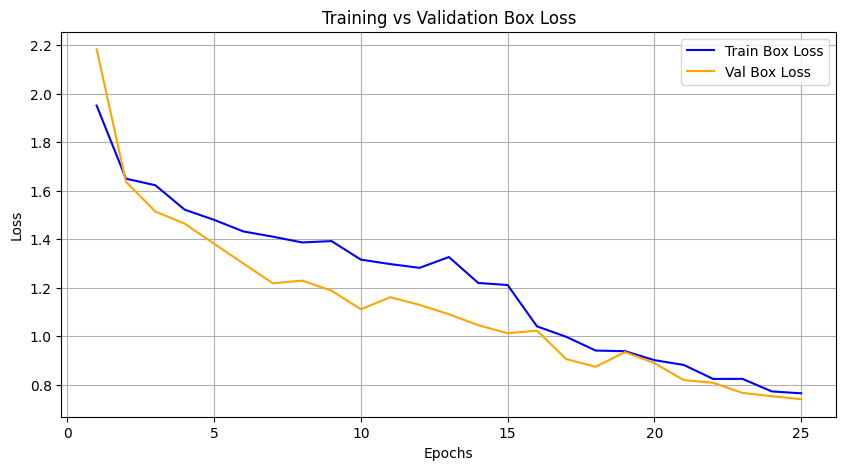

In [ ]:
# Check if metrics data exists
if 'train/box_loss' in df.columns and 'val/box_loss' in df.columns:
    # Plot Training vs Validation Box Loss
    plt.figure(figsize=(10, 5))
    plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', color='blue')
    plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', color='orange')
    plt.title("Training vs Validation Box Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Box loss data not found in the results file!")